In [5]:
#Fundamental librarys to math and stats process
import numpy as np
import numpy.random as nr
import scipy.stats as ss
import math
#data prepared
import pandas as pd

#ML preprocessi
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.pipeline import make_pipeline
from sklearn import feature_selection as fs


from sklearn.preprocessing import RobustScaler,Normalizer, MinMaxScaler,FunctionTransformer, PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPClassifier



# ML algorithms models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

# ML Evaluations
import sklearn.metrics as sklm
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


import fancyimpute
#from ._conv import register_converters as _register_converters
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsemble
from mlens.visualization import corrmat
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, confusion_matrix,classification_report,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from keras import models, layers, optimizers

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[MLENS] backend: threading


In [10]:
df_enc = (pd.read_csv('../Data/df_enc_3.csv'))

In [11]:
df.head()

,Unnamed: 0,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race_Asian,applicant_race_African_American,applicant_race_Native_Hawaiian,applicant_race_White,applicant_race_Information_not_provided,applicant_race_Not_applicable,applicant_sex_Male,applicant_sex_Female,applicant_sex_Information_not_provided,applicant_sex_Not_applicable
0,0,3,1,1,1,70,3,18,37,246,...,0,0,0,1,0,0,1,0,0,0
1,1,1,1,3,1,178,3,369,52,299,...,0,0,0,1,0,0,1,0,0,0
2,2,2,1,3,1,163,3,16,10,306,...,0,0,0,1,0,0,1,0,0,0
3,3,1,1,1,1,155,1,305,47,180,...,0,0,0,1,0,0,1,0,0,0
4,4,1,1,1,1,305,3,24,37,20,...,0,1,0,0,0,0,0,1,0,0


In [12]:
#x= df.drop(['Unnamed: 0', 'accepted'], axis=1)
#y= df['accepted']

df= df.drop(['Unnamed: 0'], axis=1)
#y= df['accepted']

In [13]:
df.shape

(500000, 54)

In [14]:
df.isnull().sum()

loan_type                                       0
property_type                                   0
loan_purpose                                    0
occupancy                                       0
loan_amount                                     0
preapproval                                     0
msa_md                                          0
state_code                                      0
county_code                                     0
applicant_ethnicity                             0
applicant_race                                  0
applicant_sex                                   0
applicant_income                                0
population                                      0
minority_population_pct                         0
ffiecmedian_family_income                       0
tract_to_msa_md_income_pct                      0
number_of_owner-occupied_units                  0
number_of_1_to_4_family_units                   0
lender                                          0


In [15]:
# Create binary features to check if the example is has missing values for all features that have missing values
for feature in df.columns:
    if np.any(np.isnan(df[feature])):
        df["is_" + feature + "_missing"] = np.isnan(df[feature]) * 1

df.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_race_Asian,applicant_race_African_American,applicant_race_Native_Hawaiian,applicant_race_White,applicant_race_Information_not_provided,applicant_race_Not_applicable,applicant_sex_Male,applicant_sex_Female,applicant_sex_Information_not_provided,applicant_sex_Not_applicable
0,3,1,1,1,70,3,18,37,246,2,...,0,0,0,1,0,0,1,0,0,0
1,1,1,3,1,178,3,369,52,299,1,...,0,0,0,1,0,0,1,0,0,0
2,2,1,3,1,163,3,16,10,306,2,...,0,0,0,1,0,0,1,0,0,0
3,1,1,1,1,155,1,305,47,180,2,...,0,0,0,1,0,0,1,0,0,0
4,1,1,1,1,305,3,24,37,20,2,...,0,1,0,0,0,0,0,1,0,0


In [16]:
x=df.drop('accepted', axis = 1)
# Convert to numpy array
x=np.array(x)
# Labels are the values we want to predict
y= df['accepted']
# Use numpy to convert to arrays
y=np.array(y)
print(x.shape)
print(y.shape)

(500000, 53)
(500000,)


In [17]:
# Saving feature names for later use
#df = df.drop('accepted', axis = 1)
feature_list = list(df.columns)
feature_list

['loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'accepted',
 'co_applicant_True',
 'co_applicant_False',
 'loan_type_conv',
 'loan_type_FHA',
 'loan_type_VA',
 'loan_type_FSA_RHS',
 'property_type_One_to_four_family',
 'property_type_Manufactured_housing',
 'property_type_Multifamily',
 'loan_purpose_Home_purchase',
 'loan_purpose_Home_improvement',
 'loan_purpose_Refinancing',
 'occupancy_Owner_occupied',
 'occupancy_Not_owner_occupied',
 'occupancy_Not_applicable',
 'preapproval_Preapproval_requested',
 'preapproval_Preapproval_not_requested',
 'preapproval_Not_applicable',
 'applicant_ethnicity_Hispanic_Latino',
 'applicant_ethnicity

Select features according to the k highest scores.
some sort of normalized values such as z-scores and therefore don't want to do any more normalization,then you should consider using the ANOVA (f_classif) scoring function for your feature selection. If you are using z-score normalization or some other normalization that uses negatives (maybe your data falls between -1 and +1),you could just use f_classif scoring function which doesn't require only positive numbers.

In [18]:
bestfeatures = fs.SelectKBest(score_func=fs.f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print 10 best features

                                Specs         Score
29          property_type_Multifamily  13106.289826
2                        loan_purpose   8811.125900
36  preapproval_Preapproval_requested   6742.605950
30         loan_purpose_Home_purchase   6301.742257
27   property_type_One_to_four_family   6265.408954
44               applicant_race_Asian   5445.969410
46     applicant_race_Native_Hawaiian   5299.462495
21                  co_applicant_True   5165.009020
20                           accepted   5165.009020
35           occupancy_Not_applicable   5118.845798
26                  loan_type_FSA_RHS   4923.917086
31      loan_purpose_Home_improvement   4263.821084
7                          state_code   4132.043896
1                       property_type   3269.627173


## ## Train models selected

### Split Data

Random state (Pseudo-random number) in Scikit learn train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.It changes. On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same. It doesn't matter what the actual random_state number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always get the same output the first time you make the split. This is useful if you want reproducible results, for example in the documentation, so that everybody can consistently see the same numbers when they run the examples. In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.Regarding your second question, a pseudo-random number generator is a number generator that generates almost truly random numbers. Why they are not truly random is out of the scope of this question and probably won't matter in your case, you can take a look here form more details.Pseudorandom number generator

In [20]:
# Original Data

#x = df.loc[:, df.columns != "accepted"].values
#y = df.loc[:, df.columns == "accepted"].values.flatten()

# splt train test
nr.seed(9988)
#x_train, x_test, y_train, y_test = train_test_split(x,y)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=54321)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.08, shuffle=True, stratify=y, random_state=54321)
print(f"Original data shapes: {x_train.shape, x_test.shape}")
print(f"Original data shapes: {y_train.shape, y_test.shape}")

Original data shapes: ((460000, 53), (40000, 53))
Original data shapes: ((460000,), (40000,))


Automatically created module for IPython interactive environment


ValueError: Found input variables with inconsistent numbers of samples: [768, 500000]

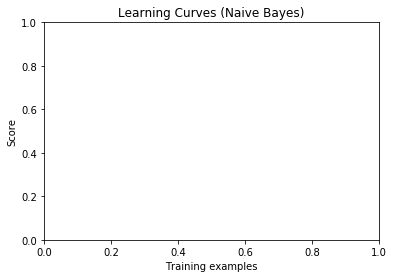

In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.08, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.08, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [26]:
# Build random forest classifier
rf = RandomForestClassifier(n_estimators=500,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

In [ ]:
# fit RF to plot feature importances
rf.fit(RobustScaler().fit_transform(Imputer(strategy="median").fit_transform(x_train)), y_train)

# Plot features importance
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 46), importances[indices], align="center")
plt.xticks(range(1, 46), df.columns[df.columns != "accepted"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

### Linear Model

In [27]:
from sklearn.ensemble import RandomForestClassifier


# Create Random Forest Regressor object
#rf = RandomForestClassifier(max_depth=8, random_state=1)

rf = RandomForestClassifier(n_estimators=100,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

In [ ]:
# Train the model using the training sets
rf.fit(x_train, y_train)
# Make predictions using the testing set
rf_pred = rf.predict(x_test)


In [ ]:
# Score the model
rf_score = f1_score(y_test, rf_pred, average='micro')
rf_score

In [ ]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)
confusion_rf

In [ ]:
columns = ['1','2','3']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

In [ ]:
print("Classification models:")
print("Random forest score: ", rf_score)

### Establish Baseline

In [ ]:
rf = RandomForestClassifier()

In [ ]:
# cross validation
Results_Forest = cross_validate(rf,x,y,scoring="r2",cv=5)

In [ ]:
Forest_test_scores = Results_Forest['test_score']
Forest_train_scores = Results_Forest['train_score']
print('Forest')
print(np.mean(Forest_train_scores))
print(np.mean(Forest_test_scores))

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = x_test[:, feature_list.index('accepted')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [ ]:
#https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
# Python script for confusion matrix creation. 
#!/usr/bin/python
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
rng = np.random.RandomState(31337)

print("Random forest binary classification")
# Build random forest classifier (same config)
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    rf_clf = RandomForestClassifier().fit(x[train_index], y[train_index])
    # make predictions for test data
    predictions = rf_clf.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))


nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid_Forest = {"n_estimators": [5,3,8],
                     'max_features':[2,4,6],
                    'max_depth': [2,4,6]}

## Perform the grid search over the parameters

Grid_Forest = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid_Forest, verbose=1)

                   
#'max_depth': [2,4,6],'n_estimators': [5,3,8],'learning_rate': [0.1,0.01],                   
Grid_Forest.fit(x,y)
print(Grid_Forest.best_score_)
print(Grid_Forest.best_params_)
    
print("start of: regression")

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    xgb_model = xgb.XGBRegressor().fit(x[train_index], y[train_index])
    predictions = xgb_model.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))
    print(mean_squared_error(actuals, predictions))

print("Parameter optimization")

xgb_model = xgb.XGBRegressor()
crf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],'n_estimators': [10,20,100],'learning_rate': [0.1,0.15,0.2]}, verbose=1)
crf.fit(x,y)
print(crf.best_score_)
print(crf.best_params_)

print("End of regressor")

# The sklearn API models are picklable
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(crf, open("Data/best_predict.pkl", "wb"))
clf2 = pickle.load(open("Data/best_predict.pkl", "rb"))
print(np.allclose(crf.predict(x), clf2.predict(x)))
# Early-stopping


#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=54321)
clf = xgb.XGBClassifier(objective="binary:logistic",
                            learning_rate=0.01,
                            n_estimators=100,
                            max_depth=6,
                            subsample=0.8,
                            random_state=54321)

eval_set = [(x_test, y_test)]
# fit model on training data
clf.fit(x_train, y_train, early_stopping_rounds=20, eval_metric="auc",eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Strategies to deal with imbalanced data</h3><br>

Classification problems in most real world applications have imbalanced data sets. In other words, the positive examples (minority class) are a lot less than negative examples (majority class). We can see that in spam detection, ads click, loan approvals, etc. In our example, the positive examples (people who haven't fully paid) were only 19% from the total examples. Therefore, accuracy is no longer a good measure of performance for different models because if we simply predict all examples to belong to the negative class, we achieve 81% accuracy. Better metrics for imbalanced data sets are *AUC* (area under the ROC curve) and f1-score. However, that's not enough because class imbalance influences a learning algorithm during training by making the decision rule biased towards the majority class by implicitly learns a model that optimizes the predictions based on the majority class in the dataset. As a result, we'll explore different methods to overcome class imbalance problem.
- Under-Sample: Under-sample the majority class with or w/o replacement by making the number of positive and negative examples equal. One of the drawbacks of under-sampling is that it ignores a good portion of training data that has valuable information. In our example, it would loose around 6500 examples. However, it's very fast to train.
- Over-Sample: Over-sample the minority class with or w/o replacement by making the number of positive and negative examples equal. We'll add around 6500 samples from the training data set with this strategy. It's a lot more computationally expensive than under-sampling. Also, it's more prune to overfitting due to repeated examples.
- EasyEnsemble: Sample several subsets from the majority class, build a classifier on top of each sampled data, and combine the output of all classifiers. More details can be found [here](http://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tsmcb09.pdf).
- Synthetic Minority Oversampling Technique (SMOTE): It over-samples the minority class but using synthesized examples. It operates on feature space not the data space. Here how it works:
    - Compute the k-nearest neighbors for all minority samples.
    - Randomly choose number between 1-k.
    - For each feature:
        - Compute the difference between minority sample and its randomly chosen neighbor (from previous step).
        - Multiply the difference by random number between 0 and 1.
        - Add the obtained feature to the synthesized sample attributes.
    - Repeat the above until we get the number of synthesized samples needed. More information can be found [here](https://www.jair.org/media/953/live-953-2037-jair.pdf).

There are other methods such as `EditedNearestNeighbors` and `CondensedNearestNeighbors` that we will not cover in this notebook and are rarely used in practice.

In most applications, misclassifying the minority class (false negative) is a lot more expensive than misclassifying the majority class (false positive). In the context of lending, loosing money by lending to a risky borrower who is more likely to not fully pay the loan back is a lot more costly than missing the opportunity of lending to trust-worthy borrower (less risky). As a result, we can use `class_weight` that changes the weight of misclassifying positive example in the loss function. Also, we can use different cut-offs assign examples to classes. By default, 0.5 is the cut-off; however, we see more often in applications such as lending that the cut-off is less than 0.5. Note that changing the cut-off from the default 0.5 reduce the overall accuracy but may improve the accuracy of predicting positive/negative examples.

We'll evaluate all the above methods plus the original model without resampling as a baseline model using the same *Random Forest* classifier we used in the missing values section.

In [ ]:
# Build random forest classifier (same config)
rf_clf = RandomForestClassifier(n_estimators=500,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

# Build model with no sampling
pip_orig = make_pipeline(Imputer(strategy="mean"),
                         RobustScaler(),
                         rf_clf)
scores = cross_val_score(pip_orig,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"\033[1m\033[94mOriginal model's average AUC: {scores.mean():.3f}")

# Build model with undersampling
pip_undersample = imb_make_pipeline(Imputer(strategy="mean"),
                                    RobustScaler(),
                                    RandomUnderSampler(), rf_clf)
scores = cross_val_score(pip_undersample,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"\033[1m\033[94mUnder-sampled model's average AUC: {scores.mean():.3f}")

# Build model with oversampling
pip_oversample = imb_make_pipeline(Imputer(strategy="mean"),
                                    RobustScaler(),
                                    RandomOverSampler(), rf_clf)
scores = cross_val_score(pip_oversample,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"\033[1m\033[94mOver-sampled model's average AUC: {scores.mean():.3f}")

# Build model with EasyEnsemble
resampled_rf = BalancedBaggingClassifier(base_estimator=rf_clf,
                                         n_estimators=10, random_state=123)
pip_resampled = make_pipeline(Imputer(strategy="mean"),
                              RobustScaler(), resampled_rf)
                             
scores = cross_val_score(pip_resampled,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"\033[1m\033[94mEasyEnsemble model's average AUC: {scores.mean():.3f}")

# Build model with SMOTE
pip_smote = imb_make_pipeline(Imputer(strategy="mean"),
                              RobustScaler(),
                              SMOTE(), rf_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"\033[1m\033[94mSMOTE model's average AUC: {scores.mean():.3f}")

In [ ]:
# Impute the missing data using features means
imp = Imputer()
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

# Standardize the data
std = RobustScaler()
std.fit(X_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

# Implement RandomUnderSampler
random_undersampler = RandomUnderSampler()
x_res, y_res = random_undersampler.fit_sample(x_train, y_train)
# Shuffle the data
perms = np.random.permutation(x_res.shape[0])
x_res = x_res[perms]
y_res = y_res[perms]
x_res.shape, y_res.shape

In [ ]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

In [ ]:
#https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
# Python script for confusion matrix creation. 
#!/usr/bin/python
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
rng = np.random.RandomState(31337)

rf_model = RandomForestClassifier()

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid_Forest = {"n_estimators": [50,100],
                     'max_features':[0.1,0.2,0.5,0.8],
                    'max_depth': [4,6]}

## Perform the grid search over the parameters

Grid_Forest = ms.GridSearchCV(estimator = rf_model, param_grid = param_grid_Forest, 
                      cv = 10, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True,
                      verbose=1)

                   
#'max_depth': [2,4,6],'n_estimators': [5,3,8],'learning_rate': [0.1,0.01],                   
Grid_Forest.fit(x,y)
print(Grid_Forest.best_score_)
print(Grid_Forest.best_params_)

print("Random forest binary classification")
# Build random forest classifier (same config)
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    rf_clf = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",max_features=0.25,max_depth=6,
                                class_weight="balanced").fit(x[train_index], y[train_index])
    # make predictions for test data
    predictions = rf_clf.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))


print("XGB binary classification")

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                            learning_rate=0.02,
                            n_estimators=8,
                            max_depth=1,
                            subsample=0.4,
                            random_state=123).fit(x[train_index], y[train_index])
    # make predictions for test data
    predictions = xgb_model.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))
    
    

print("Multiclass classification")

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                            learning_rate=0.01,
                            n_estimators=100,
                            max_depth=3,
                            subsample=0.6,
                            random_state=123).fit(x[train_index], y[train_index])
    predictions = xgb_model.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))

print("start of: regression")

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(x):
    xgb_model = xgb.XGBRegressor().fit(x[train_index], y[train_index])
    predictions = xgb_model.predict(x[test_index])
    actuals = y[test_index]
    predictions = [round(value) for value in predictions]
    # evaluate predictions
    # evaluate predictions
    accuracy = accuracy_score(actuals, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion Matrix :')
    print(confusion_matrix(actuals, predictions))
    print('Report : ')
    print(classification_report(actuals, predictions))
    print(mean_squared_error(actuals, predictions))

print("Parameter optimization")

xgb_model = xgb.XGBRegressor()
crf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],'n_estimators': [5,3,8],'learning_rate': [0.1,0.01]}, verbose=1)
crf.fit(x,y)
print(crf.best_score_)
print(crf.best_params_)

print("End of regressor")

# The sklearn API models are picklable
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(clf, open("Data/best_predict.pkl", "wb"))
clf2 = pickle.load(open("Data/best_predict.pkl", "rb"))
print(np.allclose(clf.predict(x), clf2.predict(x)))
# Early-stopping


#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=54321)
clf = xgb.XGBClassifier(objective="binary:logistic",
                            learning_rate=0.01,
                            n_estimators=200,
                            max_depth=6,
                            subsample=0.8,
                            random_state=54321)

eval_set = [(x_test, y_test)]
# fit model on training data
clf.fit(x_train, y_train, early_stopping_rounds=20, eval_metric="auc",eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## Make Prediction and Output for Scoring

Before we predict and export our score we need to apply the same changes to our test set as our training set. 

In [ ]:
test_values=pd.read_csv('Data/df_test_enc_2.csv')
test_values=test_values.drop(['Unnamed: 0'],axis=1)
test_values.head()

In [ ]:
#test_values = test_values.drop(['False_Col' 'True_Col'], axis=1)
#test_values= test_values.fillna(test_values.mean())
test_values=np.array(test_values)

In [ ]:
# Standardize the data
std = RobustScaler()
std.fit(test_values)
test_values = std.transform(test_values)

In [ ]:
# Make predictions using the testing set
rf_pred = xgb_model.predict(test_values)
rf_pred

In [ ]:
L_prediccion=pd.DataFrame(data=rf_pred,columns=['accepted'])
L_prediccion.shape

In [ ]:
L_prediccion.index.names=['row_id']
L_prediccion['accepted']= L_prediccion['accepted'].astype(np.int64)
L_prediccion.shape

In [ ]:
L_prediccion.to_csv('Data/submission.csv')

In [ ]:
data_norm = preprocessing.scale(df_enc[int_cols], axis =0)
df_trf = np.concatenate([data_norm,Features],axis=1)
df_trf = pd.DataFrame(df_trf, columns=cols)

In [ ]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.cross_validation import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [ ]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic= ['applicant_income_log','loan_amount_log','loan_purpose','co_applicant_False','co_applicant_True',
           'property_type','tract_to_msa_md_income_pct_log','minority_population_pct_log','applicant_race',
            'number_of_owner-occupied_units_log','applicant_sex','state_code_log',
            'number_of_1_to_4_family_units_log','ffiecmedian_family_income_log']

x_train = df[list(predictors_Logistic)].values
y_train = df["accepted"].values

x_test=test_values[list(predictors_Logistic)].values

In [ ]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
#predicted = number.inverse_transform(predicted)

#Store it to test dataset
df['accepted']=predicted

outcome_var = 'accepted'

classification_model(model, df,predictors_Logistic,outcome_var)

df.to_csv("Logistic_Prediction.csv",columns=['row_ID','accepted'])